## Введение в PyTorch

In [17]:
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch, torchvision
import torch.nn.functional as F
import pandas as pd
%matplotlib inline

### 1. Нахождение сложной производной.
Найдите производную по x от функции:

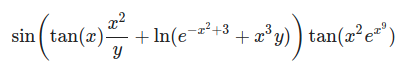

При этом надо пользоваться встроенным в PyTorch autograd.


In [2]:
def find_x_derivative(x, y):

    x = torch.tensor([x], dtype=float, requires_grad=True)
    y = torch.tensor([y], dtype=float, requires_grad=True)
    func = torch.sin( torch.tan(x)*torch.pow(x,2)/y + torch.log(torch.exp(-torch.pow(x,2)+3)+torch.pow(x,3)*y))*torch.tan(torch.pow(x,2)*torch.exp(torch.pow(x,9)))
    func.backward()

    return x.grad

In [14]:
find_x_derivative(1, 7)

tensor([9.5875], dtype=torch.float64)

### 2.	Нахождение косинусной близости
Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.
Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между векторами удобнее всего через скалярное произведение:

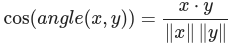

In [15]:
def get_cos_sim(A, B):
    """
        A, B - torch float tensors
    """
    A=torch.tensor(A,dtype = float)
    B=torch.tensor(B, dtype = float)
    B = B.t()

    norm_a = torch.norm(A, dim=1, keepdim=True)
    norm_b = torch.norm(B, dim=1, keepdim=True)

    A = A[:]/norm_a[:]
    B = B[:]/norm_b[:]
    B = B.t()

    return torch.mm(A,B)

In [20]:
A = torch.randn(3, 3)
A.numpy()
A

tensor([[ 0.1177, -0.6666, -0.7051],
        [ 1.1403,  0.5047, -0.8269],
        [-1.4653, -0.9402,  0.6256]])

In [19]:
B = torch.randn(3, 3)
B.numpy()
B

tensor([[-0.2061, -0.2286,  1.5995],
        [-0.1376, -1.2766, -2.3078],
        [-0.9401,  0.3541,  0.3863]])

In [23]:
get_cos_sim(A, B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor([[ 0.7686,  0.4371,  0.5249],
        [ 0.3251, -0.5955,  0.0801],
        [-0.0872,  0.7063,  0.0129]], dtype=torch.float64)

In [24]:
torch.mean(get_cos_sim(A, B))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor(0.2414, dtype=torch.float64)

### 3.	Обучение своей нейронной сети

Взять датасет Fashion-Mnist, построить свою нейронную сеть cо сверточными слоями и обучить эту нейронную сеть пользуясь материалами из вебинара. 
Архитектура нейронной сети должна быть следующая:
1.	Сначала должны идти два блока в которых должны присутствовать следующие слои:
  
  a)	два подряд идущие сверточных слоя(после каждого сверточного слоя идет активация Relu)
  
  b)	И в конце каждого блока слой макс пулинга
2.	В конце должны идти 3 линейных слоя.
При этом можете поиграться с разными оптимизаторами.
В качестве результата прошу приложить скрин с картинками и предсказанными классами.